# 3 Data Analyses
## 3.2 Time Series Analysis
### Set up environment

In [7]:
# Import packages
import copy
import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL


In [3]:
# Load 30-year records from each target station.
COH726 = pd.read_csv(r'C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Data_Products/COH726_30yr.csv')
LYN614 = pd.read_csv(r'C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Data_Products/LYN614_30yr.csv')
WEY738 = pd.read_csv(r'C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Data_Products/WEY738_30yr.csv')

# Test: The records are 30 years long.
n = 360 # Length of record in months.
assert (len(COH726) == n) & (len(LYN614) == n) & (len(WEY738) == n), "One or more records do not contain exactly 30 years of data." 

# Test: Record lengths are equal across datasets.
assert (len(COH726) == len(LYN614)) & (len(WEY738) == len(LYN614)), "One or more records are unequal lengths."


In [13]:
# Index all records by date.

dates = pd.date_range("1-1-1990", periods=len(COH726), freq="M")
dates = pd.to_datetime(dates)

COH726["Date"] = dates
COH726 = COH726.set_index("Date")
COH726 = COH726[['Precipitation']]
COH726 = COH726.dropna()

LYN614["Date"] = dates
LYN614 = LYN614.set_index("Date")
LYN614 = LYN614[['Precipitation']]
LYN614 = LYN614.dropna()

WEY738["Date"] = dates
WEY738 = WEY738.set_index("Date")
WEY738 = WEY738[['Precipitation']]
WEY738 = WEY738.dropna()


In [ ]:
ACF_plot = plot_acf(lynn_data_30yr_1d, alpha=0.05, zero=False)
plt.xlabel('Lag (months)')
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/LYN614-Autocorrelation-plot.png')

# small obs: The following month is negatively-correlated while data three months out is positively-correlated. 
# Does the 3-month lag have to do with 3-month seasonality (which is waaay more prominent in MA than anywhere else I've lived?)

# another small obs: seasonality apparent given the occilation around y = 0, with larger non-sig oscillations 
# occuring approx. one to two years (but not 12 and 24 months) out from the period of interest. 
# Is this the effects of El Niño?-

In [14]:
# See https://www.statsmodels.org/v0.12.0/_modules/statsmodels/tsa/seasonal.html.
# seasonal_decompose requires the arguement 'extrapolate_trend='freq'' to return residual and trend values.
COH_decomp = seasonal_decompose(COH726, period = 12, extrapolate_trend='freq')


Text(0.5, 0.98, 'Test')

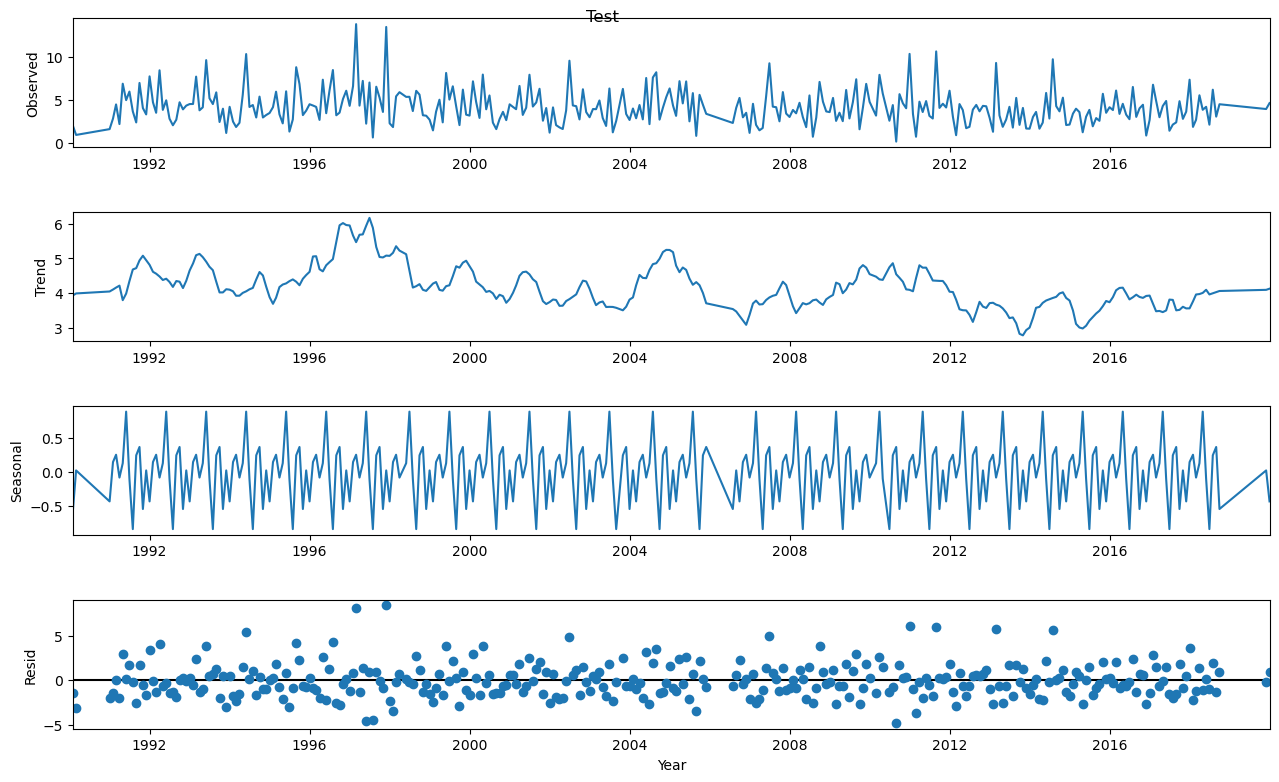

In [48]:
fig = COH_decomp.plot()
fig.set_size_inches((14,8))
fig.axes[0].set_ylabel('Observed')
plt.xlabel('Year')
plt.suptitle('Test')

Text(0.5, 23.52222222222222, 'Year')

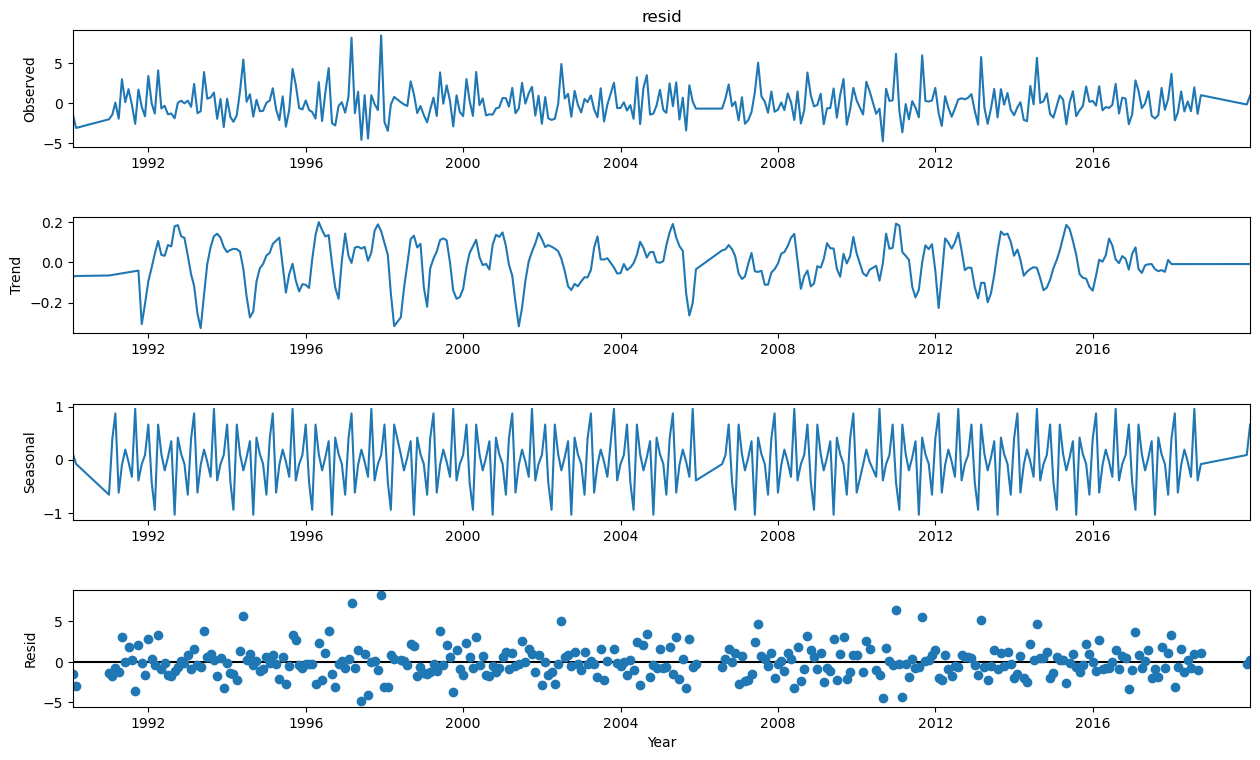

In [45]:
test = COH_decomp.resid
COH_decomp_2 = seasonal_decompose(test, period = 12*2, extrapolate_trend='freq')
fig = COH_decomp_2.plot()
fig.set_size_inches((14,8))
fig.axes[0].set_ylabel('Observed')
plt.xlabel('Year')


Date
1990-01-31   -1.468773
1990-02-28   -3.123079
1990-12-31   -2.042667
1991-01-31   -1.448207
1991-02-28    0.048117
                ...   
2018-07-31    1.940140
2018-08-31   -1.365619
2018-09-30    0.965137
2019-11-30   -0.196188
2019-12-31    0.917204
Name: resid, Length: 327, dtype: float64